<a href="https://colab.research.google.com/github/dharmawanmul/mushroom-classification/blob/master/Tugas_Besar_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Tugas Besar**

![alt text](https://it.maranatha.edu/info/img/logomaranatha.png)
## **Judul**<br/>
Perbandingan Berbagai Model Machine Learning Menggunakan Kurva ROC Untuk Memprediksi Jamur<br/>
## **Penulis**<br/>
*   1772017-Johnson Hartanto
*   1772028-Mulyadi Dharmawan

## **Latar Belakang**
Shrooming atau mushroom hunting adalah istilah yang serupa yang menggambarkan aktivitas mengumpulkan jamur di alam liar, untuk berbagai kebutuhan. Praktik ini populer di sebagian besar Eropa, Australia, Jepang, Korea, bagian Timur Tengah, dan anak benua India, serta Kanada dan Amerika Serikat.<br/>
Di Indonesia sendiri, ada beberapa jenis jamur beracun yang perlu diwaspadai karena dapat menyebabkan kematian. Oleh karena itu, penulis berharap bahwa masalah ini dapat diselesaikan dengan machine learning dengan mencoba data tentang jamur yang ada pada Amerika Utara yang telah disediakan oleh Kaggle untuk uji coba.<br/>
Dalam dataset yang penulis gunakan jamur dibagi menjadi poisonous dan edible. Setiap jamur memiliki ciri-cirinya sendiri. Oleh karena itu, penulis ingin membuat berbagai model machine learning untuk memprediksi jamur beracun atau bukan lalu membandingkan berbagai model tersebut untuk menemukan model yang terbaik untuk prediksi jamur beracun.<br/>

## **Identifikasi Masalah**
1. Penggunaan dan perancangan model **Gaussian Naive Bayes**,**Support-Vector Machine(SVM)**, **Logistic Regression**, **SGDC** dan **ANN** pada Machine Learning
2. Hasil prediksi dari model-model yang digunakan
3. Nilai recall,precision dan F1 score dari setiap model
4. Kurva ROC sebagai indikator perbandingan model


# Implementasi

## Description

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

##Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##Preprocessing

Dalam tahap preprocessing, hal-hal yang dilakukan yaitu:
1. Menghubungkan dataset yang berada dalam Gdrive
2. Menggunakan label encoder pada dataset untuk mengubah huruf menjadi angka
3. Menentukan Features dan Label
4. Melakukan standard scaling

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_dir='/content/gdrive/My Drive/'
base_dir=root_dir+'Machine Learning'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
base_dir

'/content/gdrive/My Drive/Machine Learning'

In [ ]:
import os
mushroom_path=os.path.join(base_dir,"data","mushrooms.csv")

In [ ]:
mushroom_path

'/content/gdrive/My Drive/Machine Learning/data/mushrooms.csv'

In [ ]:
import pandas as pd
mushroom=pd.read_csv(mushroom_path)

In [ ]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
mushroom.shape

(8124, 23)

In [ ]:
mushroom['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

###Change variable from string to int
Label encoder berfungsi untuk mengubah data non-numeric menjadi numeric. Label diubah menjadi numeric agar dataset dapat dianalisis

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = labelencoder.fit_transform(mushroom[col])
 
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


###Define Features and Label

In [ ]:
X=mushroom.iloc[:,1:23] # feature
y=mushroom.iloc[:,0] # label

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
X.shape

(8124, 22)

###StandardScaling
Standard scaling dilakukan karena data hasil label encode memiliki range yang berbeda-beda dan tidak bersifat binary terutama featurenya sehingga perlu dilakukan standard scaling supaya range data seimbang

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X) #scaling pada feature
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

##Train Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

y_train_p=(y_train==1)
y_test_p=(y_test==1)
y_train_p.head()

4750     True
3026     True
3757    False
6167     True
6281     True
Name: class, dtype: bool

###SGDC (Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_p)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_p, cv=5, scoring="accuracy")

array([0.9897471 , 0.96922025, 0.98221614, 0.98632011, 0.97879617])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_p, cv=3)
y_test_pred=cross_val_predict(sgd_clf,X_test,y_test_p,cv=3)
y_test_pred.size

813

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_p, y_train_pred)

array([[3709,   66],
       [  69, 3467]])

####Precision Recall F1 score

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_p, y_train_pred) #precision

0.9813189923577696

In [ ]:
recall_score(y_train_p, y_train_pred) #recall

0.9804864253393665

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_p, y_train_pred) 

0.9809025321827699

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

mushroom_LR= LogisticRegression()
mushroom_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_proba=mushroom_LR.predict_proba(X_test)[:,1]
y_pred=np.where(y_proba>0.5,1,0)
mushroom_LR.score(X_test,y_pred)

1.0

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[411,  22],
       [ 15, 365]])

In [ ]:
roc_scor=metrics.roc_auc_score(y_test,y_pred)
roc_scor

0.954859000850857

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9892913577245654

Text(0.5, 0, 'False Positive Rate')

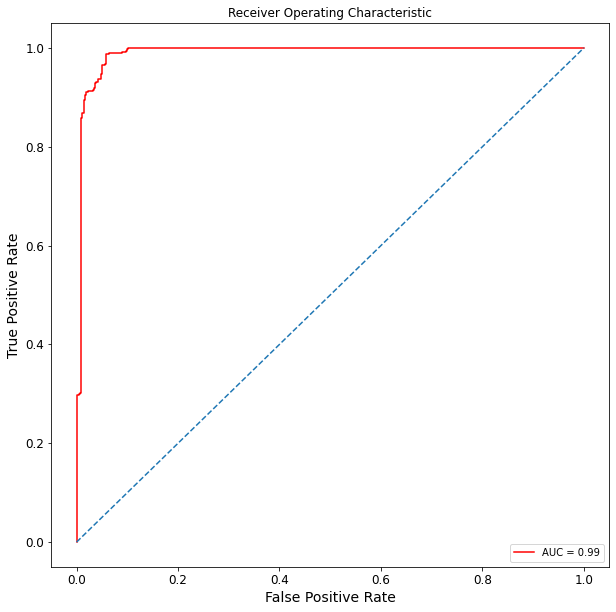

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Tuned Model
Tuning Model bertujuan untuk mencari 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_mushroom= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [ ]:
mushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [ ]:
from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_mushroom, tuned_parameters,cv=10)

In [ ]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(LR.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [ ]:
y_proba=LR.predict_proba(X_test)[:,1]
y_pred=np.where(y_proba>0.5,1,0)
LR.score(X_test,y_pred)

1.0

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[417,  16],
       [ 10, 370]])

In [ ]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.98      0.96      0.97       433\n           1       0.96      0.97      0.97       380\n\n    accuracy                           0.97       813\n   macro avg       0.97      0.97      0.97       813\nweighted avg       0.97      0.97      0.97       813\n'

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9683663546857907

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9914853531056278

Text(0.5, 0, 'False Positive Rate')

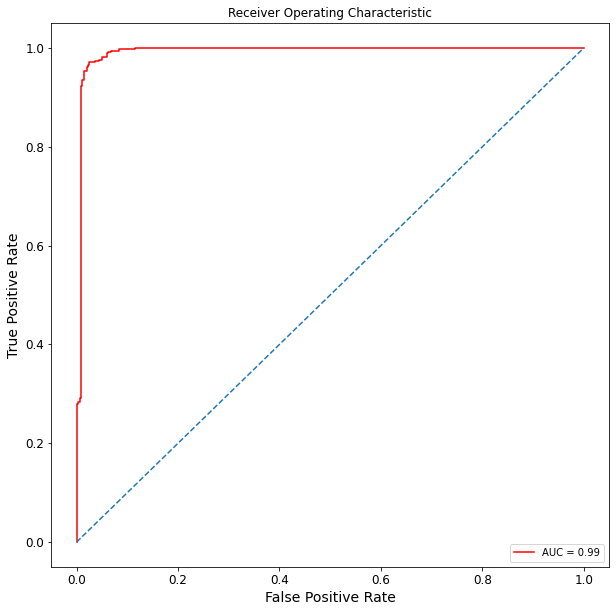

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

####Regularization

In [ ]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_proba=LR_ridge.predict_proba(X_test)[:,1]
y_pred=np.where(y_proba>0.5,1,0)
LR_ridge.score(X_test,y_pred)

1.0

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[411,  22],
       [ 15, 365]])

In [ ]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.96       433\n           1       0.94      0.96      0.95       380\n\n    accuracy                           0.95       813\n   macro avg       0.95      0.95      0.95       813\nweighted avg       0.95      0.95      0.95       813\n'

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.954859000850857

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9892913577245654

Text(0.5, 0, 'False Positive Rate')

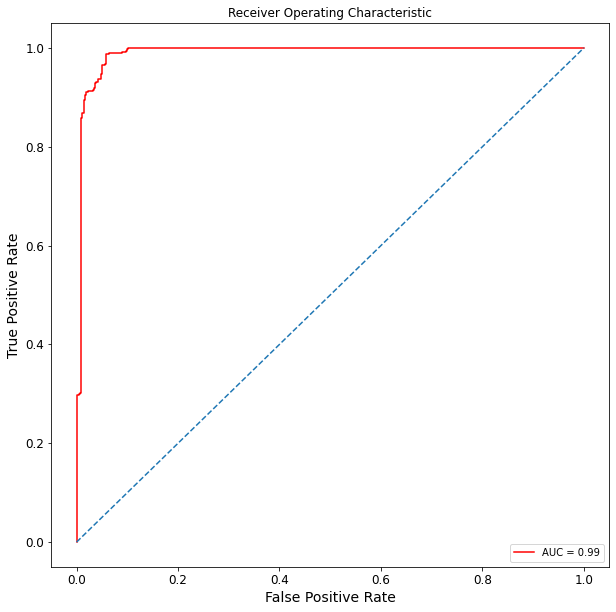

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_proba=model_bayes.predict_proba(X_test)[:,1]
y_pred=np.where(y_proba>0.5,1,0)
model_bayes.score(X_test,y_pred)

1.0

In [ ]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 813 points : 60


In [ ]:
scores = cross_val_score(model_bayes, X, y, cv=10, scoring='accuracy')
print(scores)

[0.59778598 0.78843788 0.97908979 0.9803198  0.84852217 0.81773399
 0.8091133  0.81650246 0.85098522 0.97536946]


In [ ]:
scores.mean()

0.8463860057319785

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[397,  36],
       [ 24, 356]])

In [ ]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.94      0.92      0.93       433\n           1       0.91      0.94      0.92       380\n\n    accuracy                           0.93       813\n   macro avg       0.93      0.93      0.93       813\nweighted avg       0.93      0.93      0.93       813\n'

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9268506138325028

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9603986872493011

Text(0.5, 0, 'False Positive Rate')

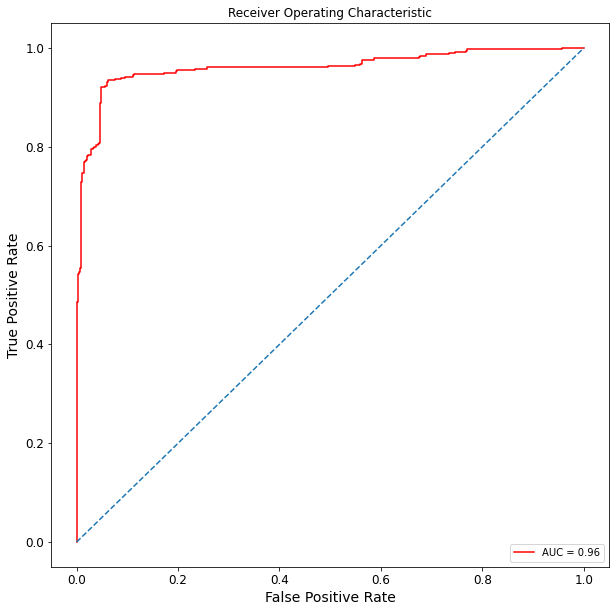

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Support Vector

In [ ]:
from sklearn.svm import SVC
svm_model= SVC()

In [ ]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20, refit=True)

In [ ]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [ ]:
print(model_svm.best_estimator_)

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 500}


In [ ]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[433,   0],
       [  0, 380]])

In [ ]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       433\n           1       1.00      1.00      1.00       380\n\n    accuracy                           1.00       813\n   macro avg       1.00      1.00      1.00       813\nweighted avg       1.00      1.00      1.00       813\n'

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

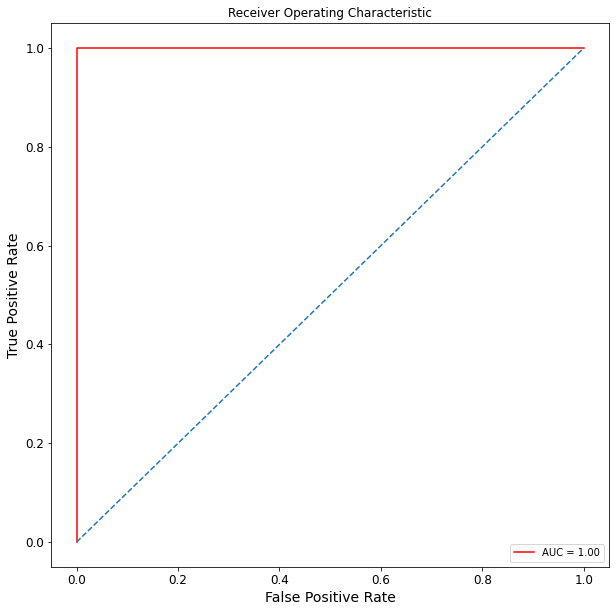

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(22,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy','mean_squared_error'])

In [ ]:
training_history = model.fit(X_train, y_train, epochs=30, batch_size= 16, verbose=0, use_multiprocessing=True)

losstrain, acctrain, msetrain = model.evaluate(X_train, y_train, verbose=0)
loss, acc, msetest = model.evaluate(X_test, y_test, verbose=0)

print('Train Accuracy: %.3f' % acctrain)
print('Test Accuracy: %.3f' % acc)
print("Average test loss: ", np.average(training_history.history['loss']))

Train Accuracy: 1.000
Test Accuracy: 1.000
Average test loss:  0.018464598673017463


{'loss': [0.33079221844673157, 0.09007410705089569, 0.048368051648139954, 0.029155690222978592, 0.01960151642560959, 0.013597064651548862, 0.008548262529075146, 0.0050330678932368755, 0.002896062331274152, 0.0018104256596416235, 0.0011721746996045113, 0.0007985972915776074, 0.0005576658877544105, 0.00039655770524404943, 0.00028964722878299654, 0.0002135508693754673, 0.00015736371278762817, 0.0001173639902845025, 8.911399345379323e-05, 6.703749386360869e-05, 5.151495861355215e-05, 3.878265488310717e-05, 2.9401739084278233e-05, 2.2317915863823146e-05, 1.7790029232855886e-05, 1.3381264579948038e-05, 1.0360186934121884e-05, 7.938057933642995e-06, 6.230790859262925e-06, 4.702860678662546e-06], 'accuracy': [0.8674600124359131, 0.9675831198692322, 0.9834495782852173, 0.9896047115325928, 0.9937081336975098, 0.9941184520721436, 0.9993160963058472, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'mean_squared_error': [0.10182789

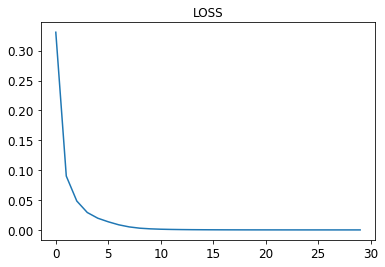

In [ ]:
plt.title("LOSS")
plt.plot(training_history.history['loss'])
print(training_history.history)

In [ ]:
y_proba=model.predict(X_test)[:]
y_pred=np.where(y_proba>0.5,1,0)

In [ ]:
annmetrics = metrics.confusion_matrix(y_test,y_pred)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [ ]:
print('True:', y_test.values[0:25])
print('False:', y_pred[0:25])

True: [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
False: [[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

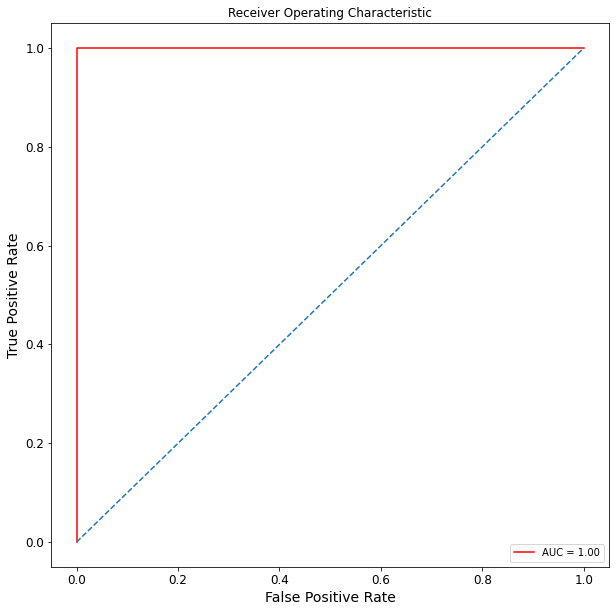

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Kesimpulan

Dari hasil percobaan yang dilakukan dengan menggunakan beberapa model yang ada, dengan membandingkan tingkat akurasinya dengan model-model lain dan melihat grafik dari ROC Curve didapatkan suatu model yang paling akurat yaitu dengan menggunakan **Support Vector Machine** dan **Artificial Neural Network**.